In [2]:
import pandas as pd
import os

In [3]:
print(os.path.exists("../dataset/version-2/orders/Store_A.csv"))

True


In [4]:
df = pd.read_csv("../dataset/version-2/sales/Store_A.csv")
df.head()

,Date,Time,Store_ID,Transaction_ID,Customer_ID,Customer_Type,Category,Product_Name,Quantity,Unit_Cost,...,Tax_Amount,Total_Amount,Gross_Profit,Profit_Margin_Percent,Payment_Method,Day_of_Week,Month,Hour_of_Day,Transaction_Total,Items_Per_Transaction
0,2024-01-01,08:30:00,Store_A,Store_A_T000015,CUST_8380,New,Electronics,Smart Watch,1,80.0,...,15.40,207.93,112.53,58.4,Debit Card,Monday,January,8,215.46,2
1,2024-01-01,08:30:00,Store_A,Store_A_T000015,CUST_8380,New,Food,Breakfast Cereal,1,2.5,...,0.56,7.53,4.47,64.1,Debit Card,Monday,January,8,215.46,2
2,2024-01-01,08:35:00,Store_A,Store_A_T000010,CUST_0306,Returning,Pharmaceuticals,Bandages Pack,1,2.0,...,0.56,7.51,4.96,71.2,Cash,Monday,January,8,86.73,2
3,2024-01-01,08:35:00,Store_A,Store_A_T000010,CUST_0306,Returning,Textiles,Dress Shirt,2,10.0,...,5.87,79.22,53.35,72.7,Cash,Monday,January,8,86.73,2
4,2024-01-01,08:41:00,Store_A,Store_A_T000032,CUST_9875,New,Pharmaceuticals,Cough Syrup,1,3.0,...,1.08,14.58,10.50,77.8,Debit Card,Monday,January,8,24.77,2


In [7]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

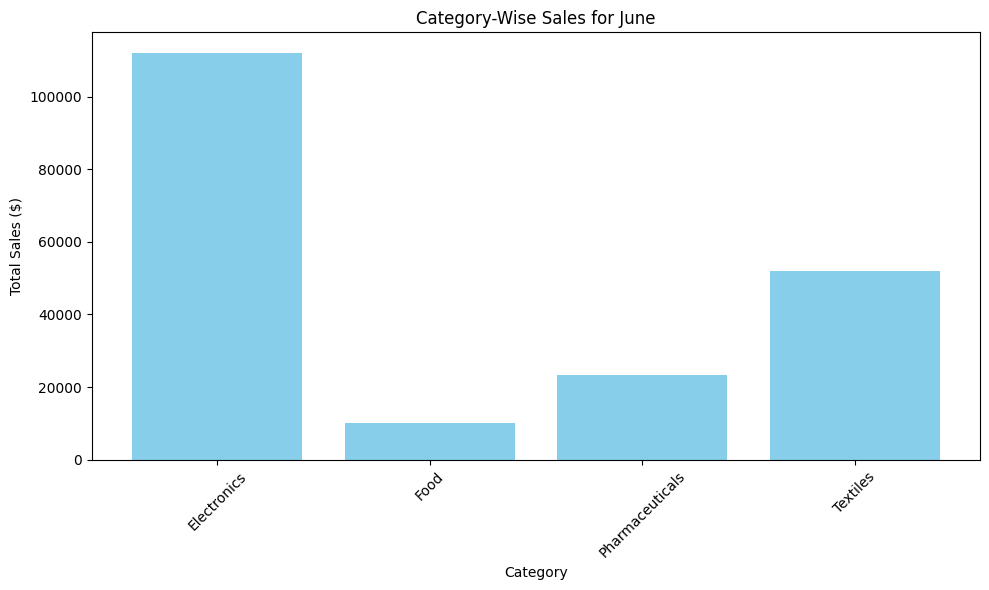

In [5]:

import matplotlib.pyplot as plt
month = 'June'  # Specify the month you want to analyze

df['Month'] = df['Month'].str.capitalize()

# Filter data for the specified month
monthly_data = df[df['Month'] == month.capitalize()]

# Check if data exists for the specified month
if monthly_data.empty:
    print(f"No data found for {month}. Please check the month name.")
    exit()

# Group by Category and sum the Total_Amount
category_sales = monthly_data.groupby('Category')['Total_Amount'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Category'], category_sales['Total_Amount'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.title(f'Category-Wise Sales for {month}')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

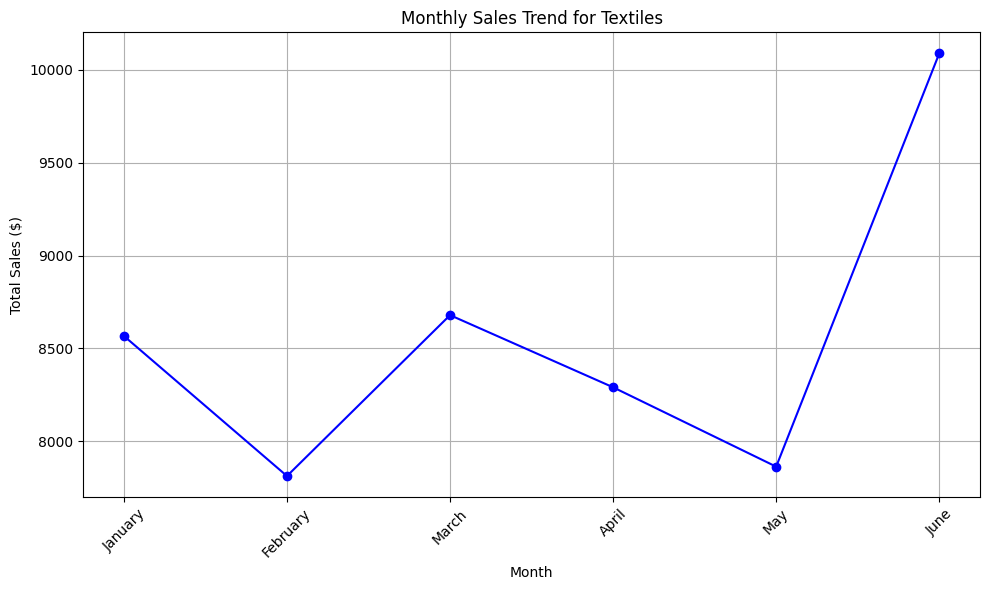

In [12]:
textiles_data = df[df['Category'] == 'Food']

# Group by Month and sum the Total_Amount
monthly_textiles_sales = textiles_data.groupby('Month')['Total_Amount'].sum().reset_index()

# Ensure months are in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_textiles_sales['Month'] = pd.Categorical(monthly_textiles_sales['Month'], categories=month_order, ordered=True)
monthly_textiles_sales = monthly_textiles_sales.sort_values('Month')

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_textiles_sales['Month'], monthly_textiles_sales['Total_Amount'], marker='o', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales Trend for Textiles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()